## Text classification

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [81]:
import os
os.getcwd()

'c:\\Users\\anna-\\OneDrive\\Dokumente\\FH\\3.Semester\\NLP\\NLP_Project'

In [82]:
df = pd.read_pickle("./Data/MovieSummaries/plots_genres.pkl")
df

,id,text,title,genre
0,23890098,shlykov a hardworking taxi driver and lyosha a...,Taxi Blues,"[Drama, World cinema]"
1,31186339,the nation of panem consists of a wealthy capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,poovalli induchoodan is sentenced for six year...,Narasimham,"[Musical, Action, Drama, Bollywood]"
3,2231378,the lemon drop kid a new york city swindler is...,The Lemon Drop Kid,"[Screwball comedy, Comedy]"
4,595909,seventhday adventist church pastor michael cha...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema..."
...,...,...,...,...
42298,34808485,the story is about reema a young muslim school...,Oomakkuyil Padumbol,[Children's]
42299,1096473,in hollywood director leo andreyev looks throu...,The Last Command,"[Silent film, Indie, Black-and-white, Period p..."
42300,35102018,american luthier focuses on randy parsons’ tra...,Randy Parsons: American Luthier,"[Short Film, Music, Biographical film, Documen..."
42301,8628195,abdur rehman khan a middleaged dry fruit selle...,Kabuliwala,[Drama]


In [83]:
df = df[~df['genre'].apply(lambda x: len(x) == 0)]
df

,id,text,title,genre
0,23890098,shlykov a hardworking taxi driver and lyosha a...,Taxi Blues,"[Drama, World cinema]"
1,31186339,the nation of panem consists of a wealthy capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,poovalli induchoodan is sentenced for six year...,Narasimham,"[Musical, Action, Drama, Bollywood]"
3,2231378,the lemon drop kid a new york city swindler is...,The Lemon Drop Kid,"[Screwball comedy, Comedy]"
4,595909,seventhday adventist church pastor michael cha...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema..."
...,...,...,...,...
42298,34808485,the story is about reema a young muslim school...,Oomakkuyil Padumbol,[Children's]
42299,1096473,in hollywood director leo andreyev looks throu...,The Last Command,"[Silent film, Indie, Black-and-white, Period p..."
42300,35102018,american luthier focuses on randy parsons’ tra...,Randy Parsons: American Luthier,"[Short Film, Music, Biographical film, Documen..."
42301,8628195,abdur rehman khan a middleaged dry fruit selle...,Kabuliwala,[Drama]


In [84]:
df.head(30)

,id,text,title,genre
0,23890098,shlykov a hardworking taxi driver and lyosha a...,Taxi Blues,"[Drama, World cinema]"
1,31186339,the nation of panem consists of a wealthy capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,poovalli induchoodan is sentenced for six year...,Narasimham,"[Musical, Action, Drama, Bollywood]"
3,2231378,the lemon drop kid a new york city swindler is...,The Lemon Drop Kid,"[Screwball comedy, Comedy]"
4,595909,seventhday adventist church pastor michael cha...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema..."
5,5272176,the president is on his way to give a speech w...,End Game,"[Thriller, Action/Adventure, Action, Drama]"
6,1952976,plot the film opens in as a young girl dahlia ...,Dark Water,"[Thriller, Drama, Horror]"
7,24225279,the story begins with hannah a young jewish te...,Sing,"[Drama, Teen]"
8,2462689,infuriated at being told to write one final co...,Meet John Doe,"[Romantic comedy, Media Satire, Americana, Com..."
9,20532852,a line of people drool at the window of the sh...,Destination Meatball,"[Short Film, Family Film, Animation]"


In [85]:
df['genre'][0]

['Drama', 'World cinema']

In [86]:
df.genre[0]

['Drama', 'World cinema']

In [87]:
df[df['genre'].apply(lambda x: 'Screwball comedy' in x)]

,id,text,title,genre
3,2231378,the lemon drop kid a new york city swindler is...,The Lemon Drop Kid,"[Screwball comedy, Comedy]"
36,10799612,like in many other monicelli movies the main t...,Amici miei,"[Drama, Screwball comedy, Buddy film, Comedy]"
388,17758086,thomas zelda has been paroled from prison for ...,Crazy on the Outside,"[Romantic comedy, Romance Film, Screwball come..."
425,3036635,restaurant owner dylan ramsey is headoverheels...,Lost & Found,"[Romantic comedy, Romance Film, Screwball come..."
429,228355,the film begins in beirut where a gang of anti...,The Naked Gun: From the Files of Police Squad!,"[Parody, Crime Fiction, Screwball comedy, Come..."
...,...,...,...,...
40794,20853333,maura is a single mom furniture repossessed be...,Happy Ever Afters,"[Romantic comedy, Romance Film, Screwball come..."
40950,145046,both the duke and duchess have an eye for beau...,The Affairs of Cellini,"[Adventure, Costume drama, Screwball comedy, B..."
41608,606121,hugo z hackenbush is a veterinarian who is hir...,A Day at the Races,"[Screwball comedy, Comedy of Errors, Comedy, B..."
41671,31111589,a man named tripp is caught in the middle of t...,Flypaper,"[Crime Fiction, Heist, Screwball comedy, Actio..."


In [88]:
df[df['genre'].apply(lambda x: "Children's" in x)]

,id,text,title,genre
75,2524925,littlefoot and his friends are constantly bein...,The Land Before Time III: The Time of the Grea...,"[Adventure, Children's/Family, Animation, Chil..."
200,6777222,the episode starts with bob the tomato with la...,"Rack, Shack, and Benny","[Short Film, Musical, Children's, Animation]"
327,16673820,dave stewie is a middle school pe teacher who ...,Gym Teacher: The Movie,"[Family Film, Children's, Coming of age, Comed..."
421,19282000,long bill longley and his best friend tom merw...,Wishbone's Dog Days of the West,"[Family Film, Children's, Comedy, Adventure]"
518,15060240,bibble is worried that he will embarrass himse...,Barbie Mariposa,"[Computer Animation, Family Film, Children's, ..."
...,...,...,...,...
41646,147697,in the films backstory human civilizations bu...,Castle in the Sky,"[Japanese Movies, Adventure, World cinema, Ani..."
41881,2117473,expand section beary barrington a young bear r...,The Country Bears,"[Children's/Family, Musical comedy, Musical, C..."
42064,5041941,read it and weep begins with freshmen jameson ...,Read It and Weep,"[Television movie, Children's, Drama, Comedy, ..."
42259,1883373,the following is a detailed overview of the mi...,LEGO Star Wars: Revenge of the Brick,"[Science Fiction, Children's, Animation]"


In [89]:
# Explode the list of lists into separate rows
df_exploded = df.explode('genre')

# Count the occurrences of each string
result = df_exploded['genre'].value_counts().reset_index()

# Rename the columns for better clarity
result.columns = ['String', 'Count']

result


,String,Count
0,Drama,19134
1,Comedy,10467
2,Romance Film,6666
3,Thriller,6530
4,Action,5868
...,...,...
358,Linguistics,1
359,Ninja movie,1
360,War effort,1
361,Patriotic film,1


In [90]:
less_25 = result[result['Count']<10]
less_25_list = less_25['String'].tolist()
less_25

,String,Count
261,Baseball,9
262,Fictional film,8
263,Horse racing,8
264,Reboot,8
265,Feature film,8
...,...,...
358,Linguistics,1
359,Ninja movie,1
360,War effort,1
361,Patriotic film,1


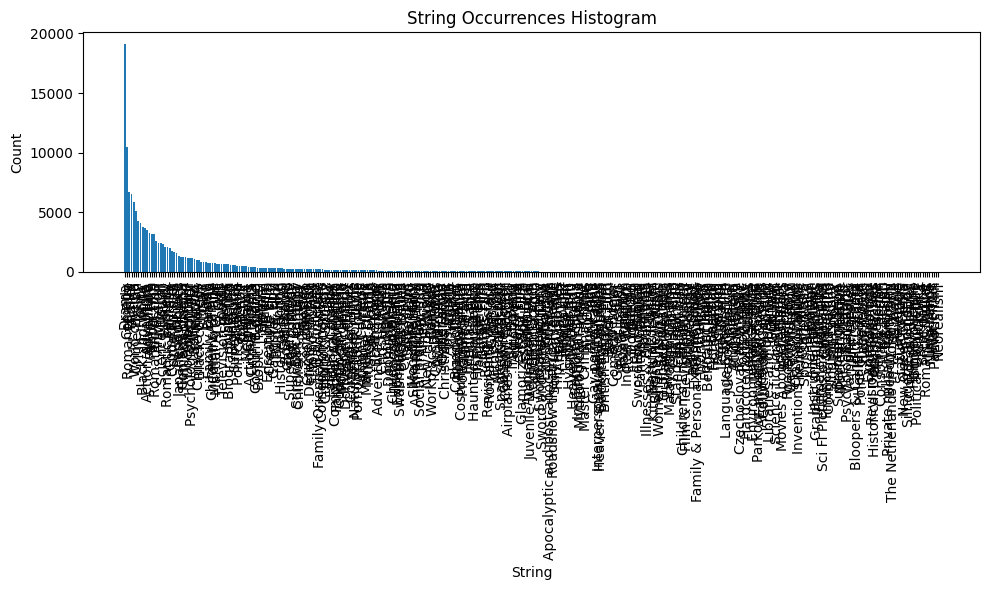

In [91]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(result['String'], result['Count'])
plt.xlabel('String')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('String Occurrences Histogram')
plt.tight_layout()
plt.show()

In [92]:
#less_25_list += ['Children\'s'] 
less_25_list

['Baseball',
 'Fictional film',
 'Horse racing',
 'Reboot',
 'Feature film',
 'Legal drama',
 'Essay Film',
 'Language & Literature',
 'Jukebox musical',
 'Northern',
 'Mumblecore',
 'Acid western',
 'Anthology',
 'Czechoslovak New Wave',
 'Pornography',
 'News',
 'Hardcore pornography',
 'Media Studies',
 'Kafkaesque',
 'Environmental Science',
 'Demonic child',
 'Parkour in popular culture',
 'Early Black Cinema',
 'Archives and records',
 'Courtroom Comedy',
 'Mondo film',
 'Libraries and librarians',
 'Outlaw',
 'Gulf War',
 'Science fiction Western',
 'Cyberpunk',
 'Sci-Fi Thriller',
 'Movies About Gladiators',
 'Space opera',
 'Roadshow/Carny',
 'School story',
 'Werewolf fiction',
 'Plague',
 'Clay animation',
 'Inventions & Innovations',
 'Therimin music',
 'Computers',
 'Sponsored film',
 'Business',
 'Humour',
 'Alien invasion',
 'Instrumental Music',
 'Graphic & Applied Arts',
 'Operetta',
 'Female buddy film',
 'Sci Fi Pictures original films',
 'Goat gland',
 'Finance & In

In [93]:
df[df['genre'].apply(lambda x: any(target in x for target in less_25_list))]

,id,text,title,genre
155,4154028,the facts in the case of m valdemar jessica va...,Two Evil Eyes,"[Thriller, Horror, Supernatural, Anthology, Ps..."
199,20753929,elinor lee a gangster’s moll living in the har...,The Notorious Elinor Lee,"[Drama, Early Black Cinema]"
273,8094606,anton steenwijks family was killed by the nazi...,The Assault,"[Thriller, World cinema, Action Thrillers, Dra..."
441,1266819,cameron joins up aboard the russian research v...,Aliens of the Deep,"[Education, Travel, Documentary]"
755,20077388,in the upper echelons of traditional middle ea...,I Can’t Think Straight,"[LGBT, Indie, Feature film, Gay Themed, Gay, G..."
...,...,...,...,...
41537,734207,businessman oh daesu is kidnapped the night of...,Oldboy,"[Thriller, World cinema, Mystery, Martial Arts..."
41677,3119257,in the reaper virus infects scotland and is be...,Doomsday,"[Thriller, Science Fiction, Doomsday film, Pla..."
41705,12059824,the film begins in with extremely exotic and u...,Beyond Words,"[Short Film, Language & Literature, Documentary]"
41808,30869314,in the harsh postwar years catalan countryside...,Black Bread,"[Crime Fiction, LGBT, World cinema, History, C..."


In [94]:
df_series = df['genre'].apply(lambda x: [item for item in x if item not in less_25_list])
df_series

0                                    [Drama, World cinema]
1        [Action/Adventure, Science Fiction, Action, Dr...
2                      [Musical, Action, Drama, Bollywood]
3                               [Screwball comedy, Comedy]
4        [Crime Fiction, Drama, Docudrama, World cinema...
                               ...                        
42298                                         [Children's]
42299    [Silent film, Indie, Black-and-white, Period p...
42300    [Short Film, Music, Biographical film, Documen...
42301                                              [Drama]
42302                                             [Comedy]
Name: genre, Length: 41793, dtype: object

In [95]:
len(df_series)

41793

In [96]:
df_series = df_series[~df_series.apply(lambda x: len(x) == 0)]

In [97]:
len(df_series)

41787

In [78]:
len(df)-len(df_series)

6

In [105]:
df

,id,text,title,genre
0,23890098,shlykov a hardworking taxi driver and lyosha a...,Taxi Blues,"[Drama, World cinema]"
1,31186339,the nation of panem consists of a wealthy capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,poovalli induchoodan is sentenced for six year...,Narasimham,"[Musical, Action, Drama, Bollywood]"
3,2231378,the lemon drop kid a new york city swindler is...,The Lemon Drop Kid,"[Screwball comedy, Comedy]"
4,595909,seventhday adventist church pastor michael cha...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema..."
...,...,...,...,...
42298,34808485,the story is about reema a young muslim school...,Oomakkuyil Padumbol,[Children's]
42299,1096473,in hollywood director leo andreyev looks throu...,The Last Command,"[Silent film, Indie, Black-and-white, Period p..."
42300,35102018,american luthier focuses on randy parsons’ tra...,Randy Parsons: American Luthier,"[Short Film, Music, Biographical film, Documen..."
42301,8628195,abdur rehman khan a middleaged dry fruit selle...,Kabuliwala,[Drama]


In [106]:
new_df = df[['id','text','title']].merge(df_series, left_index=True, how='right', right_index=True)
len(new_df)

41787

In [107]:
new_df

,id,text,title,genre
0,23890098,shlykov a hardworking taxi driver and lyosha a...,Taxi Blues,"[Drama, World cinema]"
1,31186339,the nation of panem consists of a wealthy capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,poovalli induchoodan is sentenced for six year...,Narasimham,"[Musical, Action, Drama, Bollywood]"
3,2231378,the lemon drop kid a new york city swindler is...,The Lemon Drop Kid,"[Screwball comedy, Comedy]"
4,595909,seventhday adventist church pastor michael cha...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema..."
...,...,...,...,...
42298,34808485,the story is about reema a young muslim school...,Oomakkuyil Padumbol,[Children's]
42299,1096473,in hollywood director leo andreyev looks throu...,The Last Command,"[Silent film, Indie, Black-and-white, Period p..."
42300,35102018,american luthier focuses on randy parsons’ tra...,Randy Parsons: American Luthier,"[Short Film, Music, Biographical film, Documen..."
42301,8628195,abdur rehman khan a middleaged dry fruit selle...,Kabuliwala,[Drama]


In [108]:
new_df[new_df['genre'].apply(lambda x: len(x) == 0)]

,id,text,title,genre
